# Google Play Store Analysis.

The aim of this analysis is to explore the characteristics and performance of mobile applications in the dataset, identifying trends in app ratings, installs, and pricing. It seeks to evaluate the relationship between app features and user satisfaction while providing insights into category performance and the impact of pricing on ratings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('googleplaystore.csv')

In [3]:
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Data Cleaning

In [6]:
dataset['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [7]:
dataset['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

Text(0.5, 0.98, 'Category visualizing')

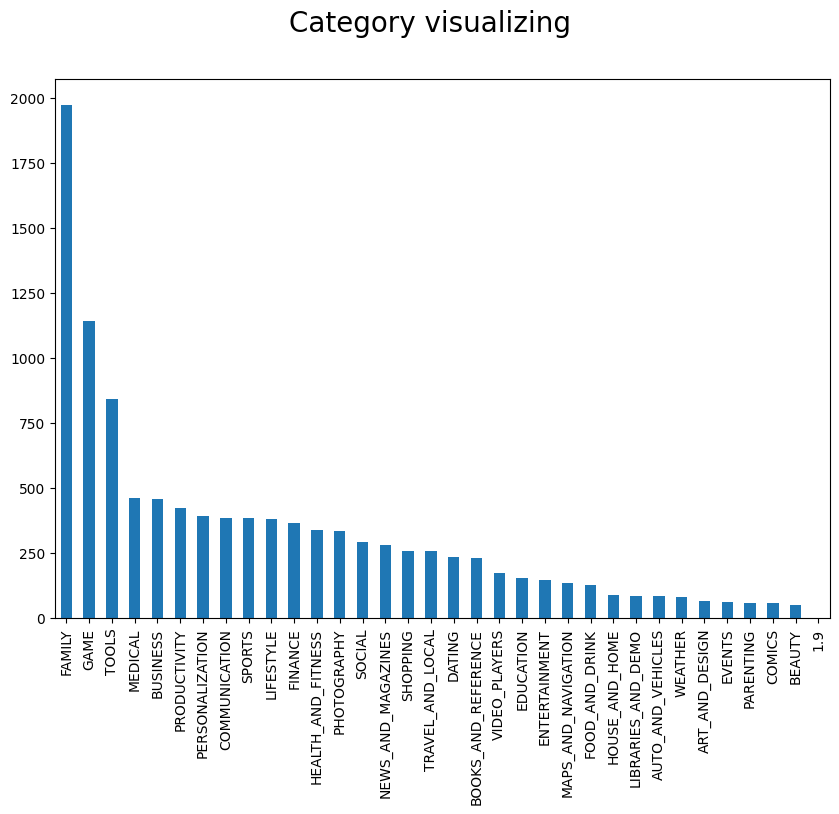

In [8]:
dataset['Category'].value_counts().plot(kind='bar',figsize=(10,7))
plt.suptitle('Category visualizing',fontsize=20)

In [9]:
dataset['Rating'].mean()

4.193338315362443

In [10]:
dataset['Rating']=dataset['Rating'].fillna(4.19)

In [11]:
dataset['Rating'].value_counts()

4.19     1474
4.40     1109
4.30     1076
4.50     1038
4.20      952
4.60      823
4.10      708
4.00      568
4.70      499
3.90      386
3.80      303
5.00      274
3.70      239
4.80      234
3.60      174
3.50      163
3.40      128
3.30      102
4.90       87
3.00       83
3.10       69
3.20       64
2.90       45
2.80       42
2.70       25
2.60       25
2.50       21
2.30       20
2.40       19
1.00       16
2.20       14
1.90       13
2.00       12
1.70        8
1.80        8
2.10        8
1.60        4
1.40        3
1.50        3
1.20        1
19.00       1
Name: Rating, dtype: int64

Text(0.5, 0.98, 'Rating visualizing')

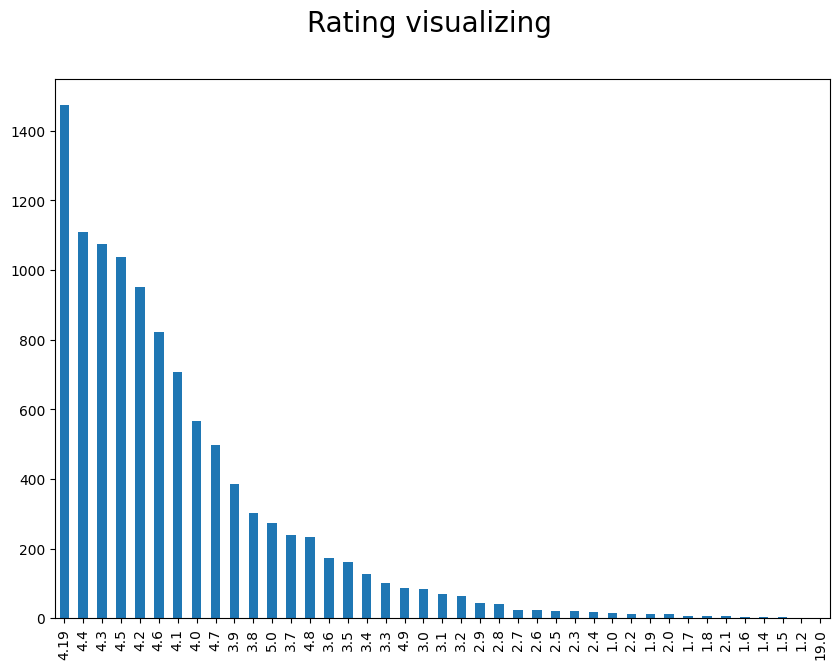

In [12]:
dataset['Rating'].value_counts().plot(kind='bar',figsize=(10,7))
plt.suptitle('Rating visualizing',fontsize=20)

In [13]:
dataset['Reviews']=dataset['Reviews'].astype(str).str.replace('3.0M', '3000000')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9676\578918974.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Reviews']=dataset['Reviews'].astype(str).str.replace('3.0M', '3000000')


In [14]:
dataset['Reviews']=dataset['Reviews'].astype(int)

In [15]:
dataset['Reviews'].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [16]:
dataset['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
429k                     1
200k                     1
460k                     1
728k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [17]:
dataset['Installs'] = dataset['Installs'].astype(str).str.replace('+', '')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9676\2176049241.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['Installs'] = dataset['Installs'].astype(str).str.replace('+', '')


In [18]:
dataset['Installs'] = dataset['Installs'].astype(str).str.replace(',', '')

In [19]:
dataset['Installs'] = dataset['Installs'].astype(str).str.replace('Free', '0')

In [20]:
dataset['Installs']=dataset['Installs'].astype(int)

In [21]:
dataset['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: Installs, dtype: int64

Text(0.5, 0.98, 'Install data visualizing')

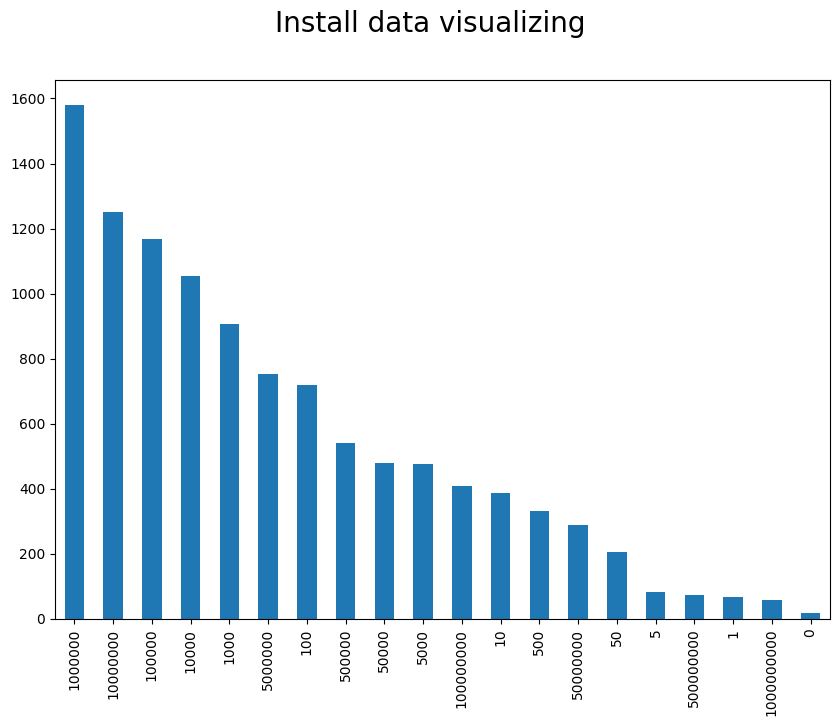

In [22]:
dataset['Installs'].value_counts().plot(kind='bar',figsize=(10,7))
plt.suptitle('Install data visualizing',fontsize=20)

In [23]:
dataset['Type']=dataset['Type'].astype(str).str.replace('0', 'Free')

In [24]:
dataset['Type']=dataset['Type'].astype(str).str.replace('nan', 'Free')

In [25]:
dataset['Type'].value_counts()

Free    10041
Paid      800
Name: Type, dtype: int64

Text(0.5, 0.98, 'Type data visualizing')

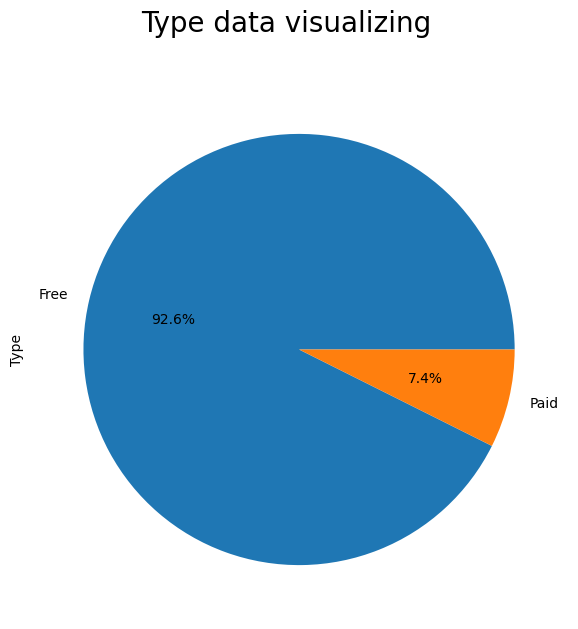

In [26]:
dataset['Type'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(10,7))
plt.suptitle('Type data visualizing',fontsize=20)

In [27]:
dataset['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

Text(0.5, 0.98, 'Price data visualizing')

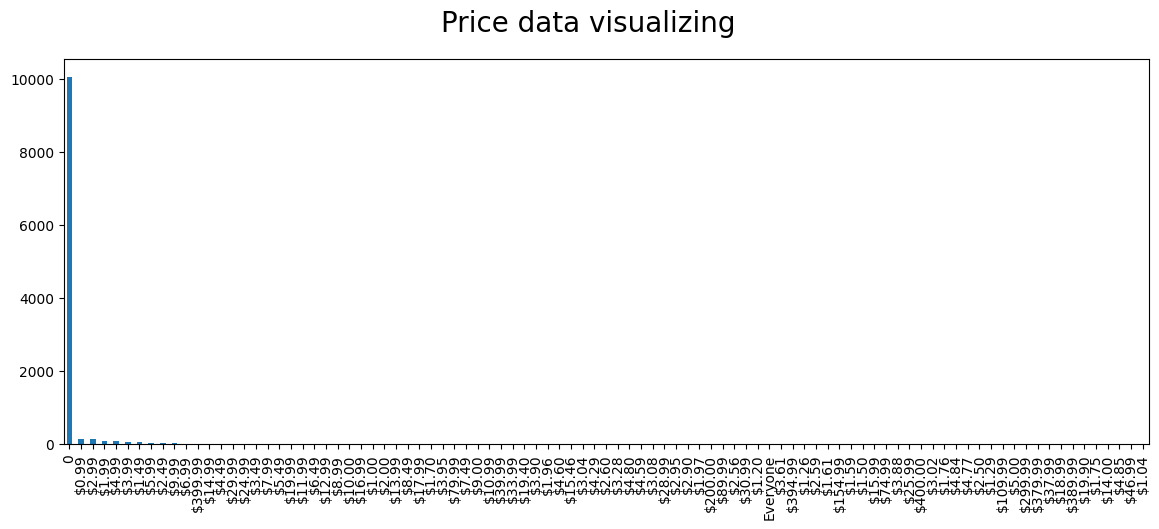

In [28]:
dataset['Price'].value_counts().plot(kind='bar',figsize=(14,5))
plt.suptitle('Price data visualizing',fontsize=20)

In [29]:
dataset['Content Rating']=dataset['Content Rating'].fillna('Everyone')

In [30]:
dataset['Content Rating'].value_counts()

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 0.98, 'Content Rating Visualization')

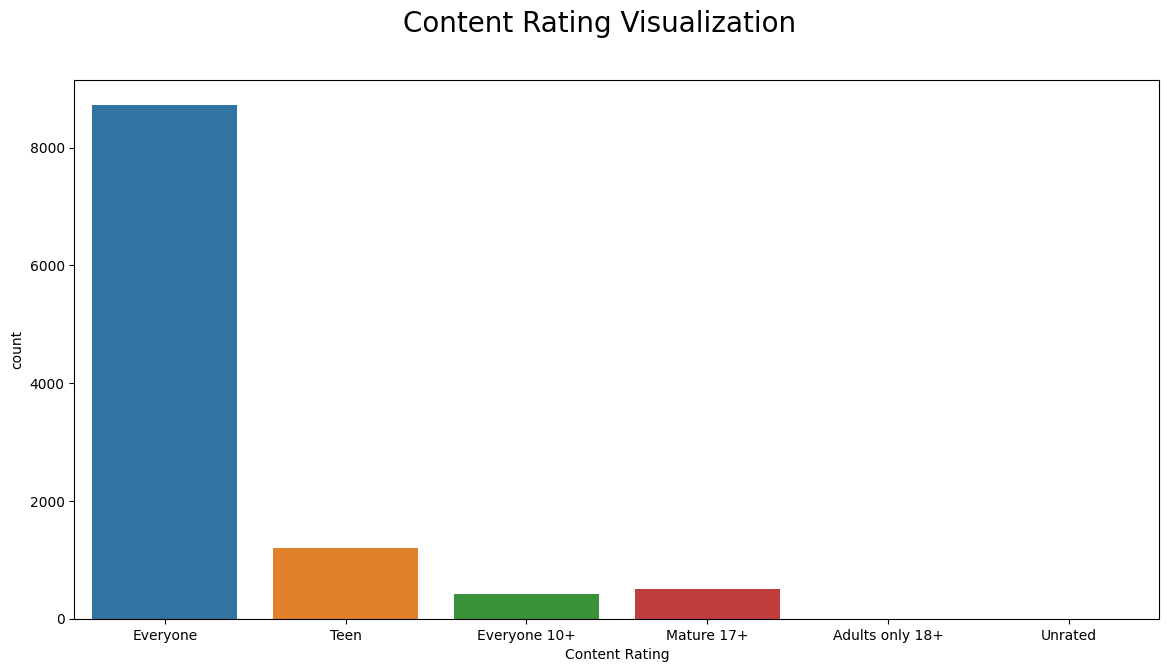

In [31]:
plt.figure(figsize=(14,7))
sns.countplot(data=dataset,x='Content Rating')
plt.suptitle('Content Rating Visualization',fontsize=20)

In [32]:
dataset['Genres'].value_counts()

Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 120, dtype: int64

Text(0.5, 0.98, 'Genres Visualization')

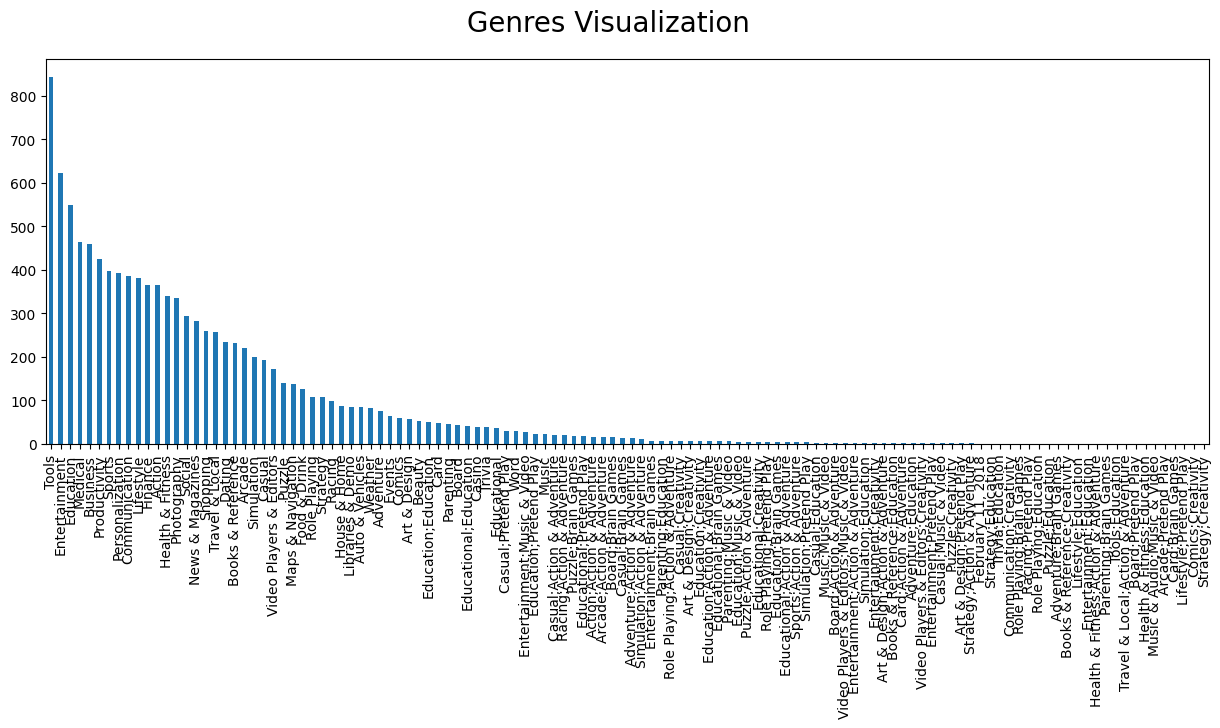

In [33]:
dataset['Genres'].value_counts().plot(kind='bar',figsize=(15,5))
plt.suptitle('Genres Visualization',fontsize=20)

In [34]:
dataset['Last Updated'].value_counts()

August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
                     ... 
March 20, 2014          1
April 7, 2015           1
September 22, 2014      1
October 3, 2015         1
March 23, 2014          1
Name: Last Updated, Length: 1378, dtype: int64

In [35]:
dataset['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
1.0.17.3905              1
15.1.2                   1
4.94.19                  1
1.1.11.11                1
2.0.148.0                1
Name: Current Ver, Length: 2832, dtype: int64

In [36]:
dataset['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Text(0.5, 0.98, 'Android Version Visualization')

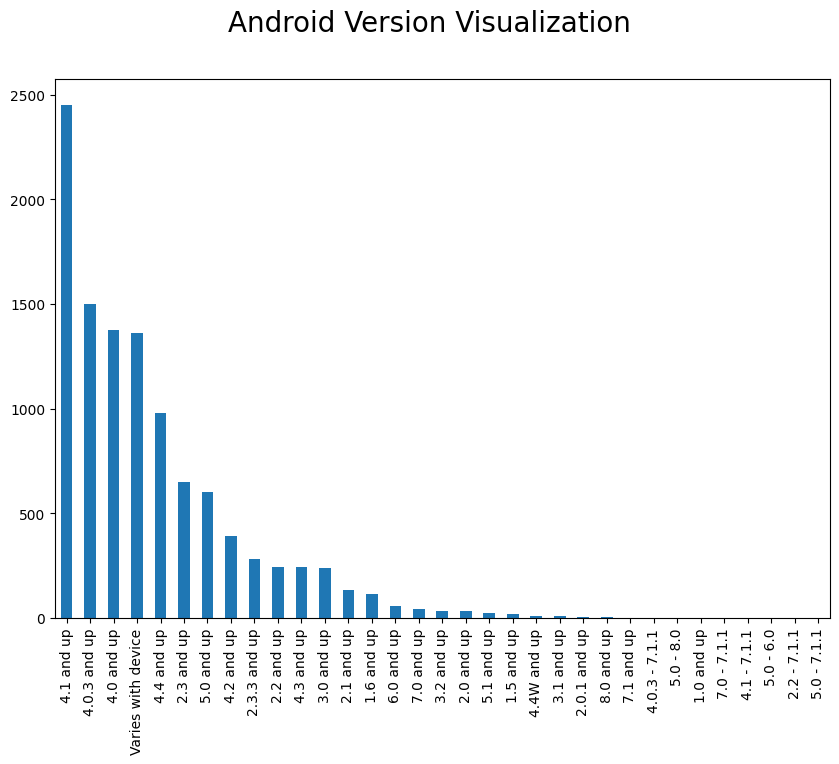

In [37]:
dataset['Android Ver'].value_counts().plot(kind='bar',figsize=(10,7))
plt.suptitle('Android Version Visualization',fontsize=20)

# Comparison of Multiple data's in a dataset.

Text(0.5, 0.98, 'Comparing Category Vs Rating data in the dataset.')

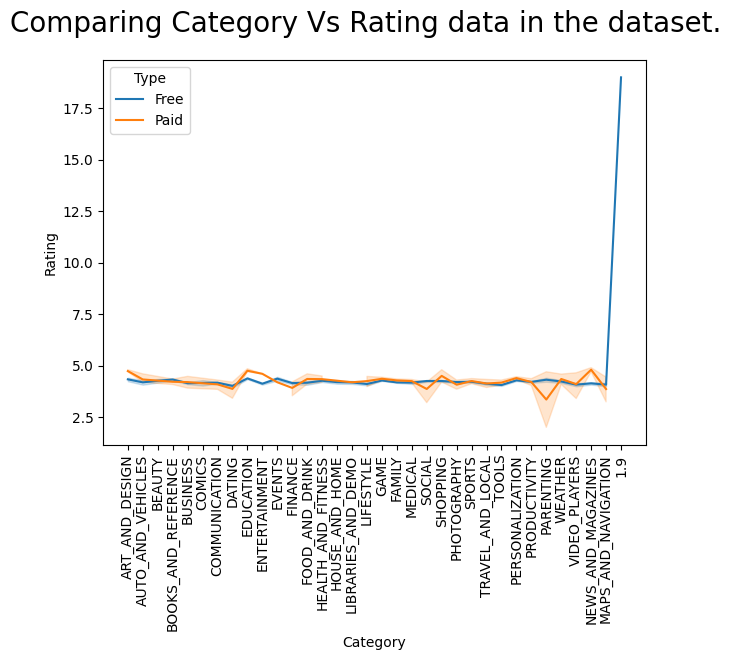

In [38]:
plt.figure(figsize=(7,5))
sns.lineplot(data=dataset,x='Category',y='Rating',hue='Type')
plt.xticks(rotation=90)
plt.suptitle('Comparing Category Vs Rating data in the dataset.',fontsize=20)

Text(0.5, 0.98, 'Comparing Category Vs Rating data in the dataset.')

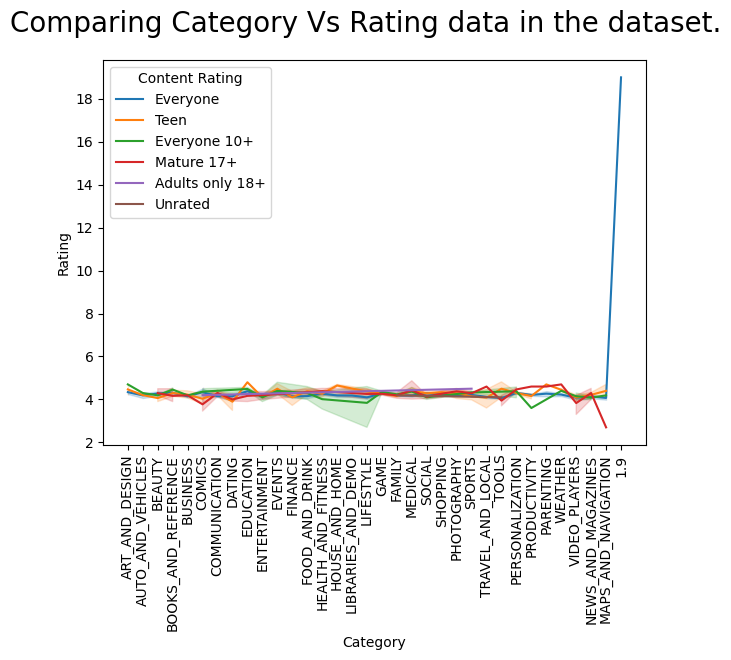

In [39]:
plt.figure(figsize=(7,5))
sns.lineplot(data=dataset,x='Category',y='Rating',hue='Content Rating')
plt.xticks(rotation=90)
plt.suptitle('Comparing Category Vs Rating data in the dataset.',fontsize=20)

Text(0.5, 0.98, 'Comparing Category Vs Type data in the dataset.')

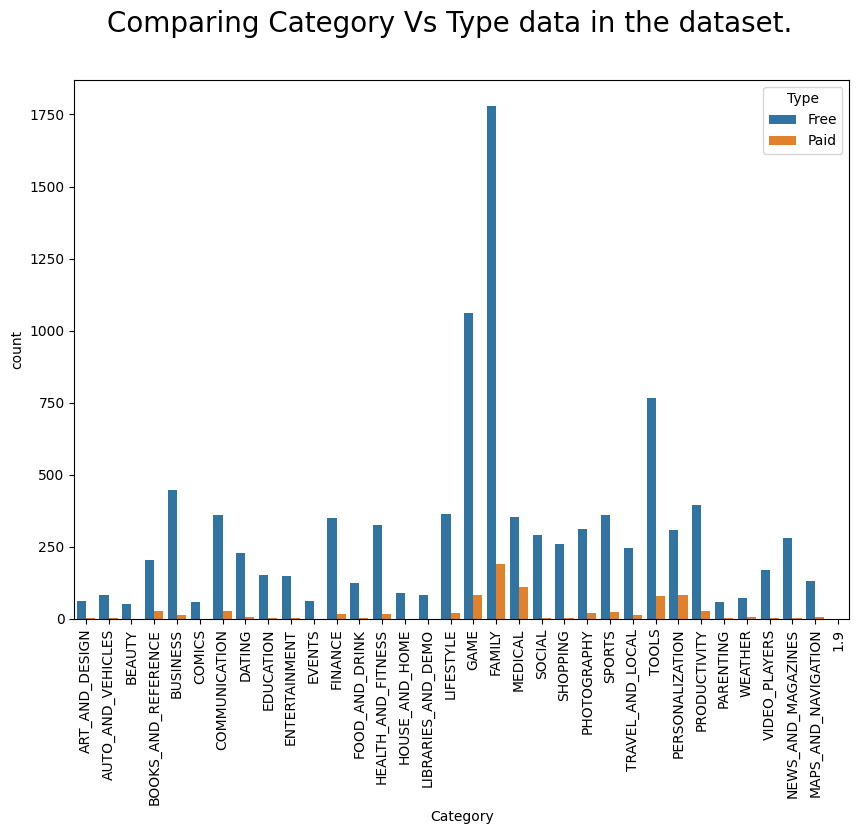

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(data=dataset,x='Category',hue='Type')
plt.xticks(rotation=90)
plt.suptitle('Comparing Category Vs Type data in the dataset.',fontsize=20)

Text(0.5, 0.98, 'Comparing Category Vs Content Rating in the dataset.')

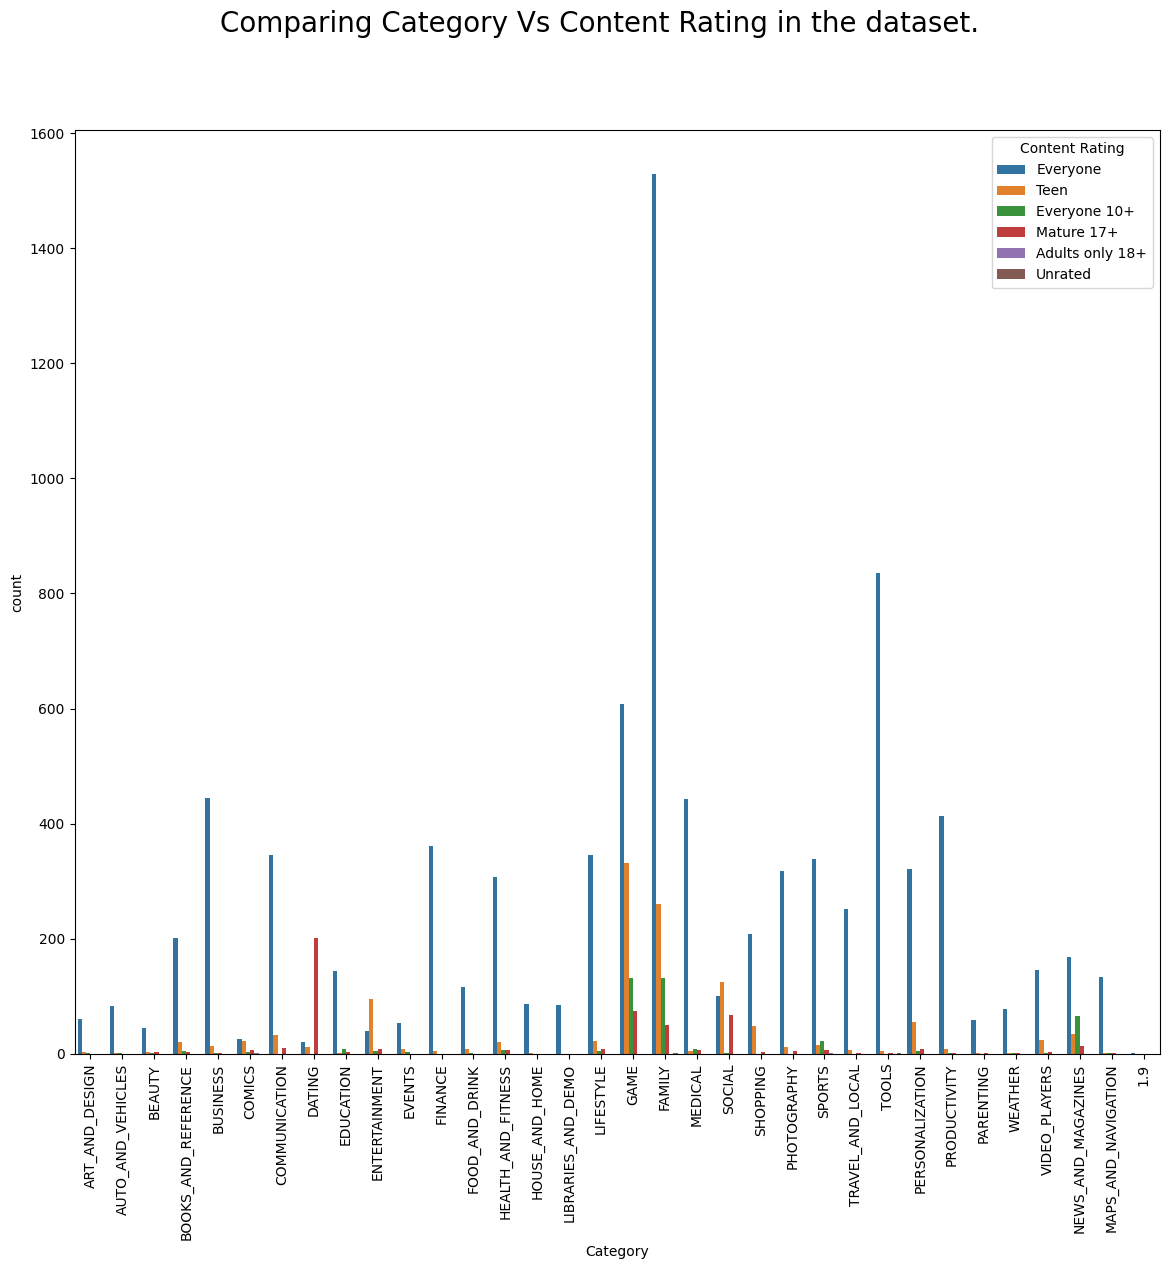

In [41]:
plt.figure(figsize=(14,12))
sns.countplot(data=dataset,x='Category',hue='Content Rating')
plt.xticks(rotation=90)
plt.suptitle('Comparing Category Vs Content Rating in the dataset.',fontsize=20)

Text(0.5, 0.98, 'Rating by Category')

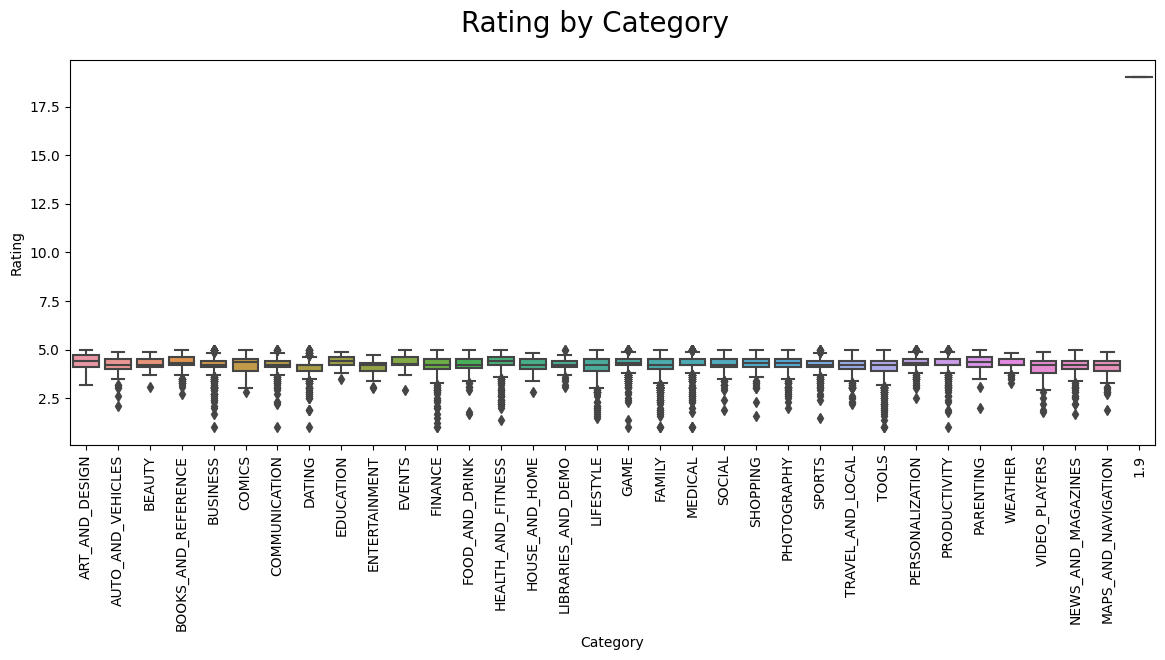

In [42]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Category', y='Rating', data=dataset)
plt.xticks(rotation=90)
plt.suptitle('Rating by Category',fontsize=20)

Text(0.5, 0.98, 'Count of Free vs Paid Apps')

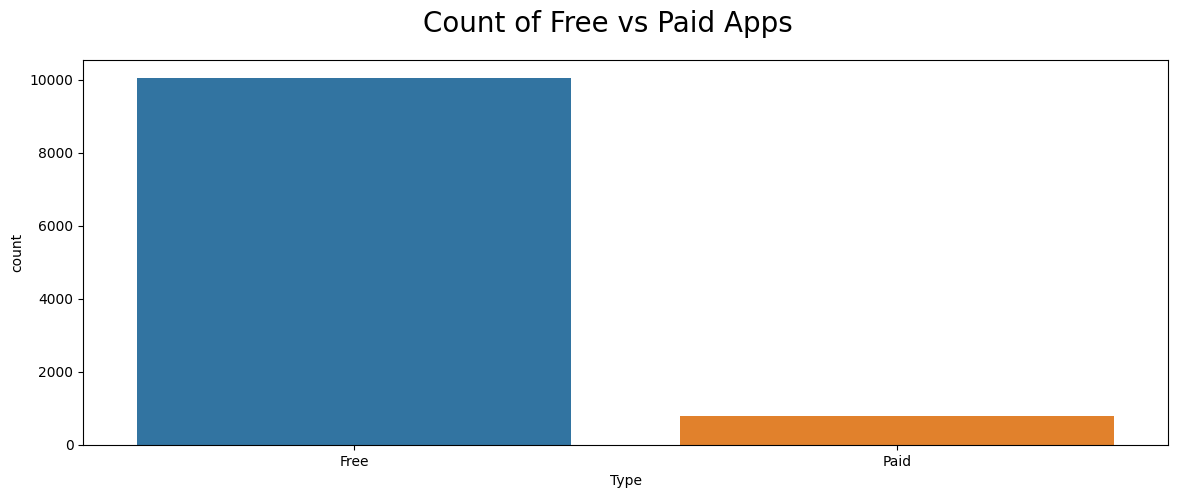

In [43]:
plt.figure(figsize=(14,5))
sns.countplot(x='Type', data=dataset)
plt.suptitle('Count of Free vs Paid Apps',fontsize=20)

# Grouping & Aggregation.

Text(0.5, 1.0, 'Average Ratings by Category')

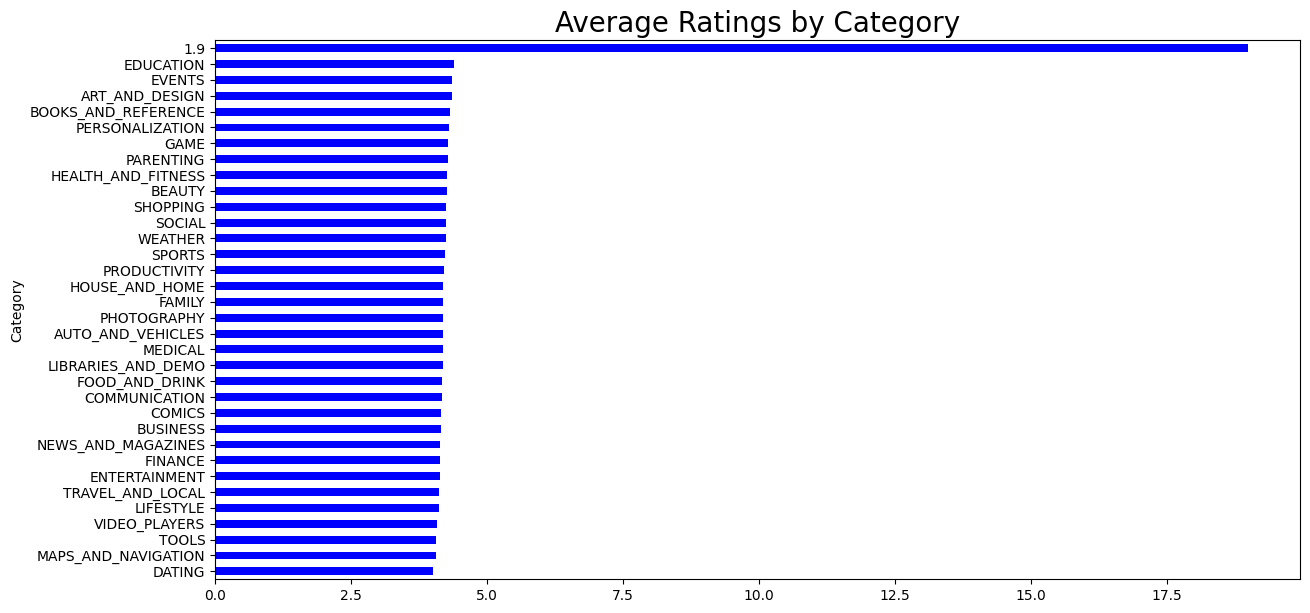

In [44]:
plt.figure(figsize=(14,7))
avg_rating_by_category = dataset.groupby('Category')['Rating'].mean().sort_values()
avg_rating_by_category.plot(kind='barh', color='blue')
plt.title('Average Ratings by Category',fontsize=20)

In [46]:
min_rating=dataset['Rating'].min()
min_rating

1.0

In [47]:
max_rating=dataset['Rating'].max()
max_rating

19.0

In [48]:
max_per_app=dataset[dataset['Rating']==max_rating]
max_per_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",0,Free,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,NaN


In [49]:
overall_install=dataset.groupby('Category')['Installs'].sum().sort_values(ascending=False)
overall_install

Category
GAME                   35086024415
COMMUNICATION          32647276251
PRODUCTIVITY           14176091369
SOCIAL                 14069867902
TOOLS                  11452771915
FAMILY                 10258263505
PHOTOGRAPHY            10088247655
NEWS_AND_MAGAZINES      7496317760
TRAVEL_AND_LOCAL        6868887146
VIDEO_PLAYERS           6222002720
SHOPPING                3247848785
ENTERTAINMENT           2869160000
PERSONALIZATION         2325494782
BOOKS_AND_REFERENCE     1921469576
SPORTS                  1751174498
HEALTH_AND_FITNESS      1583072512
BUSINESS                1001914865
FINANCE                  876648734
EDUCATION                871452000
MAPS_AND_NAVIGATION      724281890
LIFESTYLE                537643539
WEATHER                  426100520
FOOD_AND_DRINK           273898751
DATING                   264310807
HOUSE_AND_HOME           168712461
ART_AND_DESIGN           124338100
LIBRARIES_AND_DEMO        62995910
COMICS                    56086150
MEDICAL    

Text(0.5, 0.98, 'Maximum Downaload')

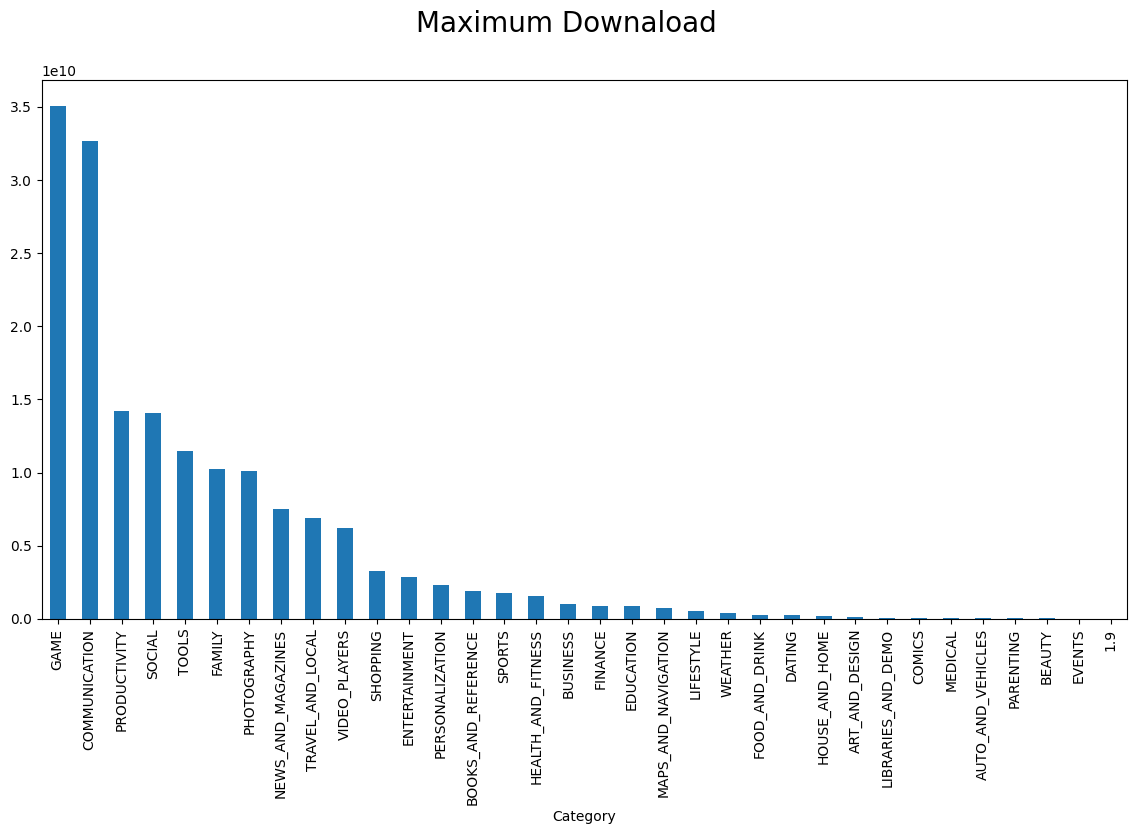

In [50]:
overall_install.plot(kind='bar',figsize=(14,7))
plt.suptitle('Maximum Downaload',fontsize=20)

In [51]:
max_install=dataset.groupby('Category')['Installs'].max().sort_values(ascending=False)
max_install

Category
SOCIAL                 1000000000
COMMUNICATION          1000000000
PHOTOGRAPHY            1000000000
PRODUCTIVITY           1000000000
GAME                   1000000000
FAMILY                 1000000000
ENTERTAINMENT          1000000000
NEWS_AND_MAGAZINES     1000000000
TOOLS                  1000000000
BOOKS_AND_REFERENCE    1000000000
TRAVEL_AND_LOCAL       1000000000
VIDEO_PLAYERS          1000000000
HEALTH_AND_FITNESS      500000000
SPORTS                  100000000
EDUCATION               100000000
PERSONALIZATION         100000000
BUSINESS                100000000
FINANCE                 100000000
SHOPPING                100000000
LIFESTYLE               100000000
MAPS_AND_NAVIGATION     100000000
ART_AND_DESIGN           50000000
WEATHER                  50000000
HOUSE_AND_HOME           10000000
PARENTING                10000000
LIBRARIES_AND_DEMO       10000000
FOOD_AND_DRINK           10000000
DATING                   10000000
COMICS                   10000000
BEAUT

Text(0.5, 0.98, 'Maximum Install')

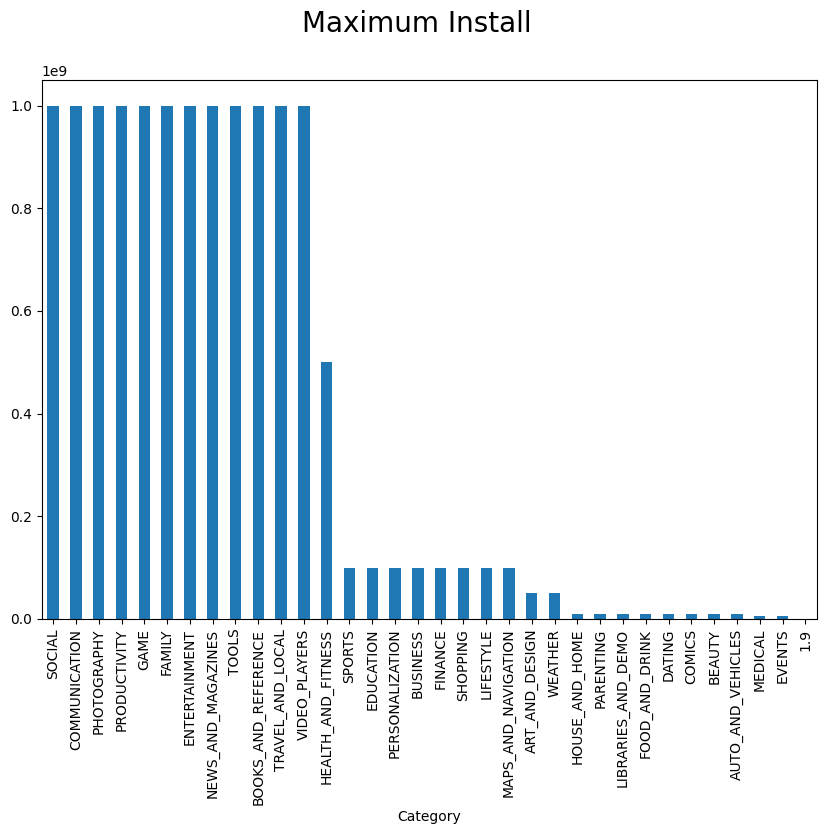

In [52]:
max_install.plot(kind='bar',figsize=(10,7))
plt.suptitle('Maximum Install',fontsize=20)

In [53]:
min_install=dataset.groupby('Category')['Installs'].min().sort_values(ascending=False)
min_install

Category
ENTERTAINMENT          10000
EDUCATION               1000
BEAUTY                    50
COMICS                    50
WEATHER                   10
VIDEO_PLAYERS             10
PARENTING                 10
MAPS_AND_NAVIGATION       10
LIBRARIES_AND_DEMO        10
SHOPPING                   5
PHOTOGRAPHY                5
GAME                       1
TOOLS                      1
SPORTS                     1
HEALTH_AND_FITNESS         1
HOUSE_AND_HOME             1
FOOD_AND_DRINK             1
EVENTS                     1
AUTO_AND_VEHICLES          1
BOOKS_AND_REFERENCE        1
COMMUNICATION              1
DATING                     1
NEWS_AND_MAGAZINES         0
MEDICAL                    0
PERSONALIZATION            0
ART_AND_DESIGN             0
PRODUCTIVITY               0
FAMILY                     0
SOCIAL                     0
BUSINESS                   0
LIFESTYLE                  0
TRAVEL_AND_LOCAL           0
FINANCE                    0
1.9                        0
Name:

Text(0.5, 0.98, 'Minimum install')

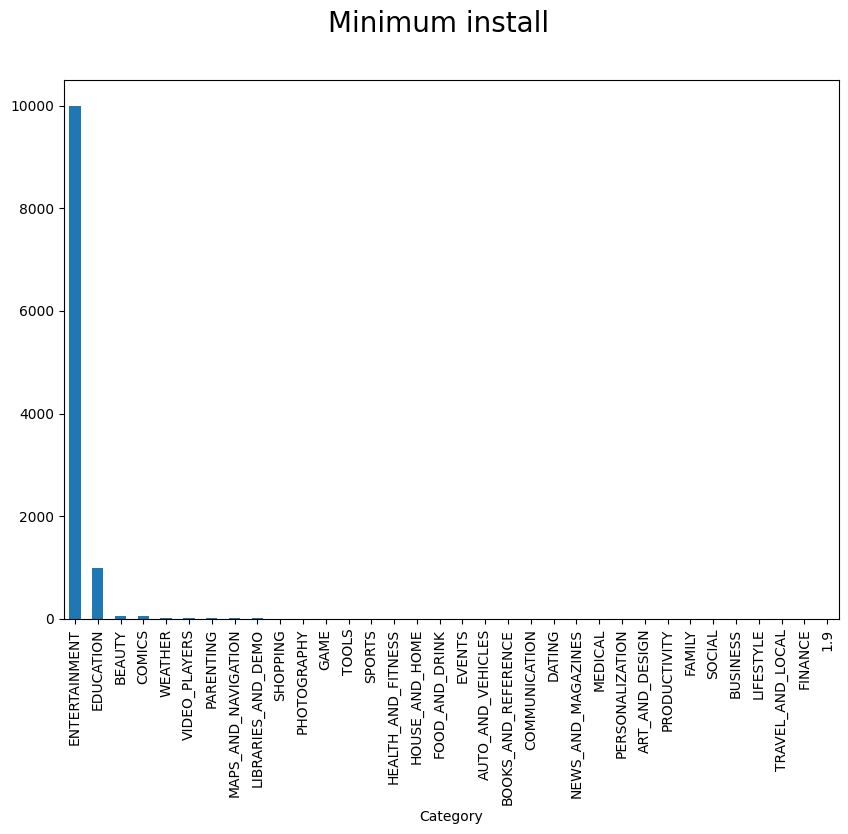

In [54]:
min_install.plot(kind='bar',figsize=(10,7))
plt.suptitle('Minimum install',fontsize=20)

In [55]:
max_rating=dataset.groupby('Category')['Rating'].max().sort_values(ascending=False)
max_rating

Category
1.9                    19.0
TRAVEL_AND_LOCAL        5.0
SPORTS                  5.0
SOCIAL                  5.0
SHOPPING                5.0
PRODUCTIVITY            5.0
PHOTOGRAPHY             5.0
PERSONALIZATION         5.0
PARENTING               5.0
NEWS_AND_MAGAZINES      5.0
MEDICAL                 5.0
LIFESTYLE               5.0
LIBRARIES_AND_DEMO      5.0
ART_AND_DESIGN          5.0
HEALTH_AND_FITNESS      5.0
GAME                    5.0
FOOD_AND_DRINK          5.0
FINANCE                 5.0
FAMILY                  5.0
EVENTS                  5.0
DATING                  5.0
COMMUNICATION           5.0
COMICS                  5.0
BUSINESS                5.0
BOOKS_AND_REFERENCE     5.0
TOOLS                   5.0
MAPS_AND_NAVIGATION     4.9
VIDEO_PLAYERS           4.9
EDUCATION               4.9
BEAUTY                  4.9
AUTO_AND_VEHICLES       4.9
HOUSE_AND_HOME          4.8
WEATHER                 4.8
ENTERTAINMENT           4.7
Name: Rating, dtype: float64

Text(0.5, 0.98, 'Maximum rating of each categories')

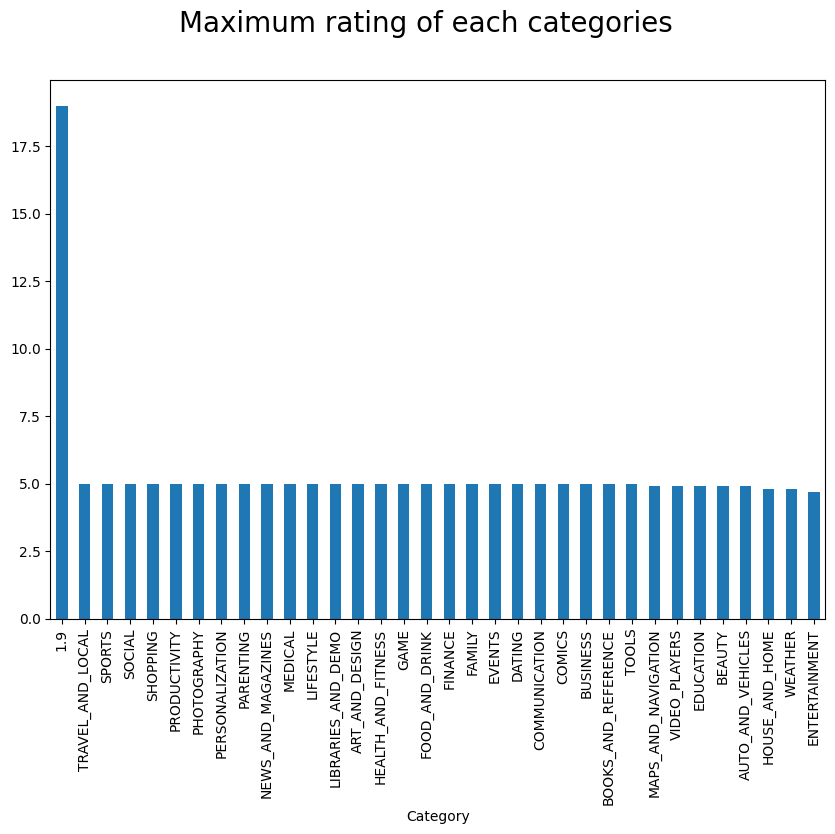

In [56]:
max_rating.plot(kind='bar',figsize=(10,7))
plt.suptitle('Maximum rating of each categories',fontsize=20)

In [57]:
min_rating=dataset.groupby('Category')['Rating'].min().sort_values(ascending=False)
min_rating

Category
1.9                    19.0
EDUCATION               3.5
WEATHER                 3.3
ART_AND_DESIGN          3.2
BEAUTY                  3.1
LIBRARIES_AND_DEMO      3.1
ENTERTAINMENT           3.0
EVENTS                  2.9
COMICS                  2.8
HOUSE_AND_HOME          2.8
BOOKS_AND_REFERENCE     2.7
PERSONALIZATION         2.5
TRAVEL_AND_LOCAL        2.2
AUTO_AND_VEHICLES       2.1
PHOTOGRAPHY             2.0
PARENTING               2.0
SOCIAL                  1.9
MAPS_AND_NAVIGATION     1.9
VIDEO_PLAYERS           1.8
FOOD_AND_DRINK          1.7
NEWS_AND_MAGAZINES      1.7
SHOPPING                1.6
LIFESTYLE               1.5
SPORTS                  1.5
HEALTH_AND_FITNESS      1.4
BUSINESS                1.0
COMMUNICATION           1.0
MEDICAL                 1.0
DATING                  1.0
GAME                    1.0
PRODUCTIVITY            1.0
FINANCE                 1.0
TOOLS                   1.0
FAMILY                  1.0
Name: Rating, dtype: float64

Text(0.5, 0.98, 'Minimum rating of each categories')

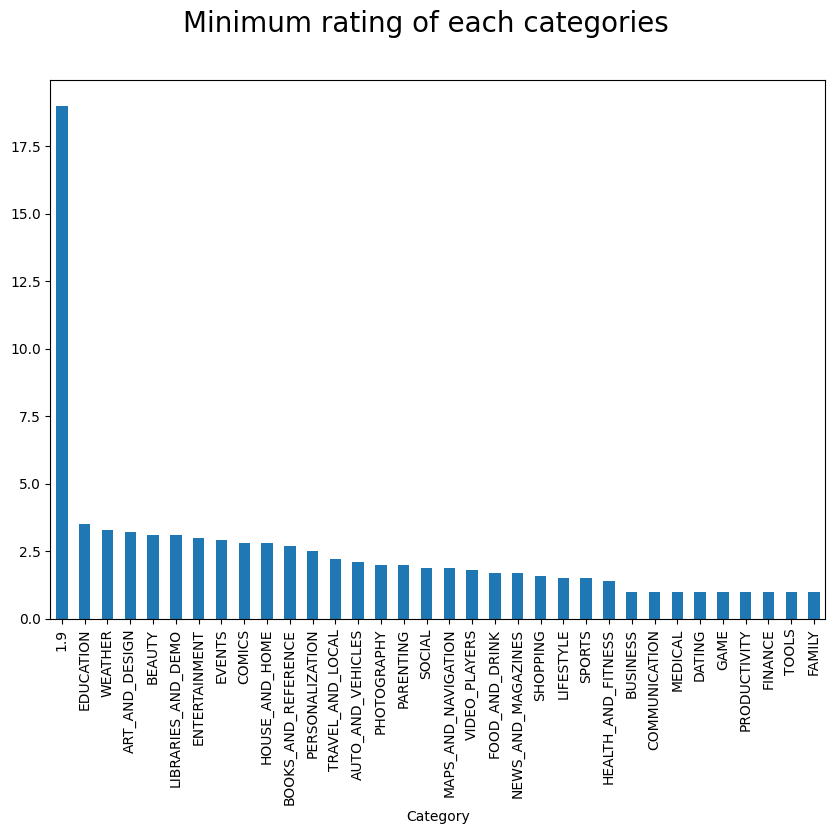

In [58]:
min_rating.plot(kind='bar',figsize=(10,7))
plt.suptitle('Minimum rating of each categories',fontsize=20)

In [59]:
overall_reviews=dataset.groupby('Category')['Reviews'].sum().sort_values(ascending=False)
overall_reviews

Category
GAME                   1585422349
COMMUNICATION           815462260
SOCIAL                  621241422
FAMILY                  410226330
TOOLS                   273185044
PHOTOGRAPHY             213516650
SHOPPING                115041222
PRODUCTIVITY            114116975
VIDEO_PLAYERS           110380188
PERSONALIZATION          89346140
SPORTS                   70830169
TRAVEL_AND_LOCAL         62617919
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54400863
EDUCATION                39595786
HEALTH_AND_FITNESS       37893743
MAPS_AND_NAVIGATION      30659254
BOOKS_AND_REFERENCE      21959069
FINANCE                  17550728
WEATHER                  14604735
BUSINESS                 13954552
LIFESTYLE                12882784
FOOD_AND_DRINK            8883330
DATING                    7291278
HOUSE_AND_HOME            3976385
COMICS                    3383276
1.9                       3000000
ART_AND_DESIGN            1714440
MEDICAL                   1585975
AUTO_

Text(0.5, 0.98, 'Overall Reviews')

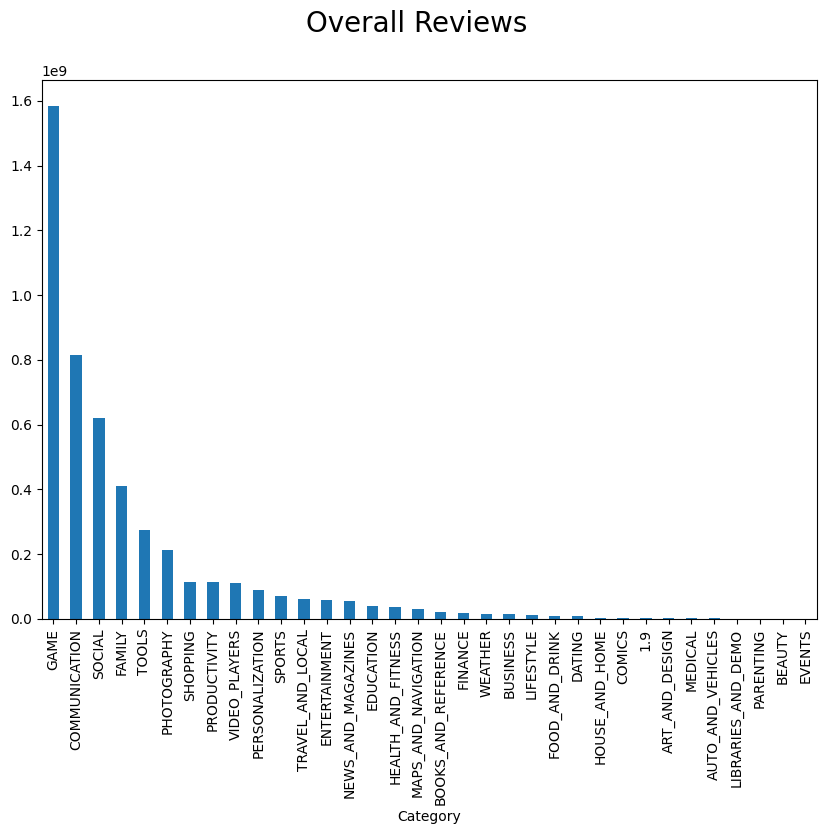

In [60]:
overall_reviews.plot(kind='bar',figsize=(10,7))
plt.suptitle('Overall Reviews',fontsize=20)

In [61]:
max_reviews=dataset.groupby('Category')['Reviews'].max().sort_values(ascending=False)
max_reviews

Category
SOCIAL                 78158306
COMMUNICATION          69119316
GAME                   44893888
FAMILY                 44881447
TOOLS                  42916526
VIDEO_PLAYERS          25655305
SPORTS                 14184910
NEWS_AND_MAGAZINES     11667403
PHOTOGRAPHY            10859051
TRAVEL_AND_LOCAL        9235373
PERSONALIZATION         7464996
MAPS_AND_NAVIGATION     7232629
ENTERTAINMENT           7165362
EDUCATION               6290507
SHOPPING                6212081
PRODUCTIVITY            5383985
HEALTH_AND_FITNESS      4559407
1.9                     3000000
BOOKS_AND_REFERENCE     2915189
LIFESTYLE               2789775
WEATHER                 2371543
FINANCE                 1374549
BUSINESS                1279800
FOOD_AND_DRINK          1032935
COMICS                  1013944
PARENTING                658087
DATING                   516917
HOUSE_AND_HOME           417907
LIBRARIES_AND_DEMO       332083
ART_AND_DESIGN           295237
AUTO_AND_VEHICLES        271920

Text(0.5, 0.98, 'Maximum Reviews')

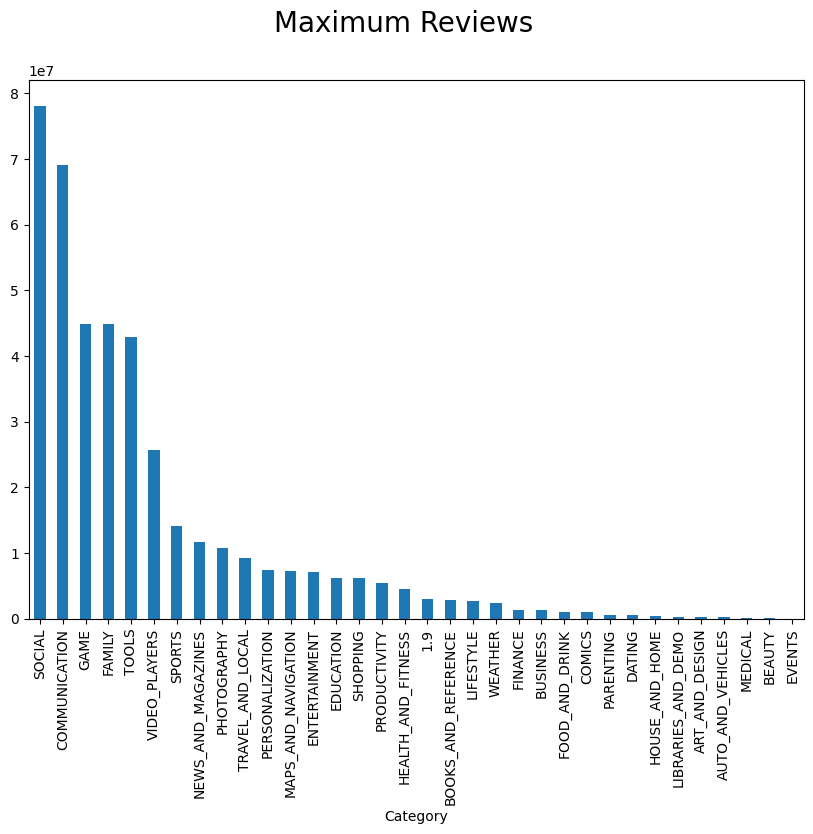

In [62]:
max_reviews.plot(kind='bar',figsize=(10,7))
plt.suptitle('Maximum Reviews',fontsize=20)

In [63]:
min_reviews=dataset.groupby('Category')['Reviews'].min().sort_values(ascending=False)
min_reviews

Category
1.9                    3000000
ENTERTAINMENT              303
EDUCATION                   11
COMICS                       1
PARENTING                    1
TRAVEL_AND_LOCAL             0
TOOLS                        0
SPORTS                       0
SOCIAL                       0
SHOPPING                     0
LIFESTYLE                    0
VIDEO_PLAYERS                0
PRODUCTIVITY                 0
PHOTOGRAPHY                  0
PERSONALIZATION              0
NEWS_AND_MAGAZINES           0
MEDICAL                      0
MAPS_AND_NAVIGATION          0
HOUSE_AND_HOME               0
LIBRARIES_AND_DEMO           0
ART_AND_DESIGN               0
HEALTH_AND_FITNESS           0
GAME                         0
FOOD_AND_DRINK               0
FINANCE                      0
FAMILY                       0
EVENTS                       0
DATING                       0
COMMUNICATION                0
BUSINESS                     0
BOOKS_AND_REFERENCE          0
BEAUTY                       0

Text(0.5, 0.98, 'Minimum Review')

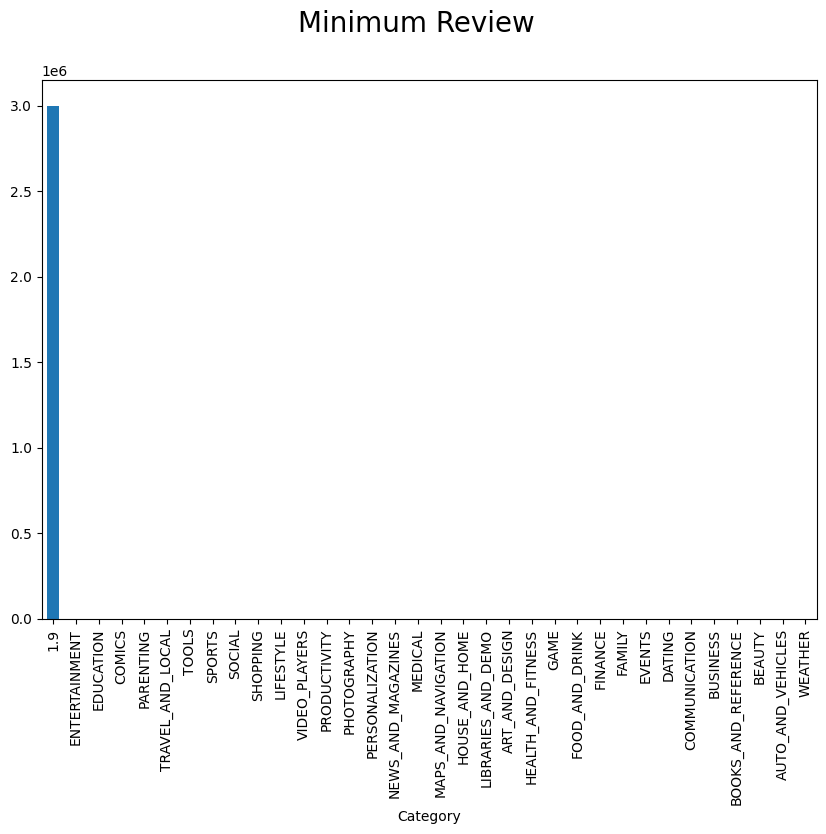

In [64]:
min_reviews.plot(kind='bar',figsize=(10,7))
plt.suptitle('Minimum Review',fontsize=20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9676\1659846701.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')


Text(0.5, 0.98, 'Correlating the dataset')

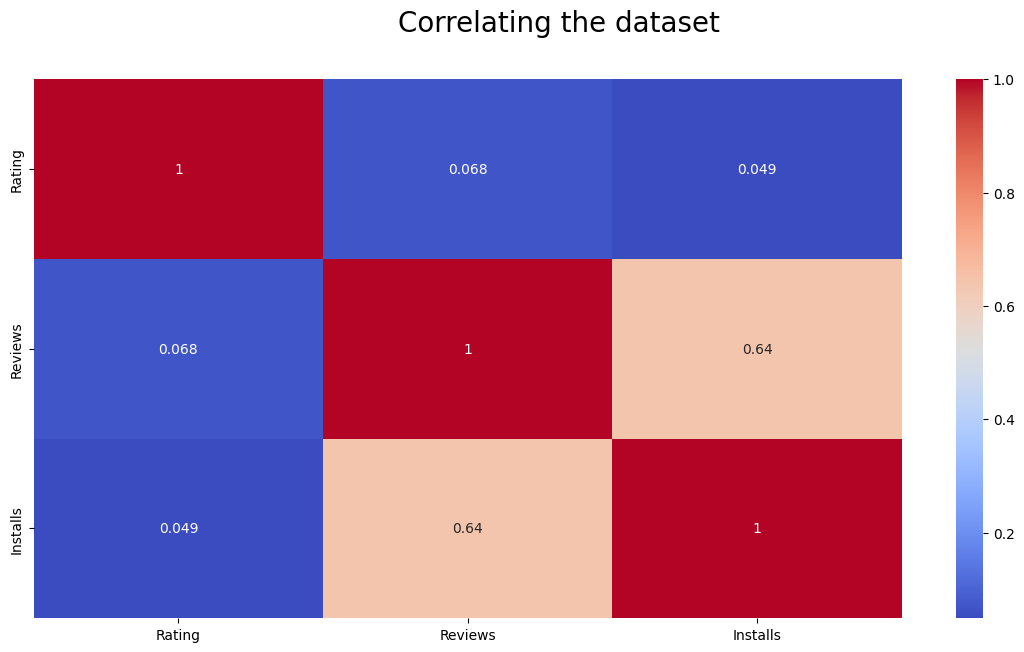

In [65]:
plt.figure(figsize=(14,7))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.suptitle('Correlating the dataset',fontsize=20)

# FEATURE ENGINEERING

In [66]:
# Create bins for Rating
rating_bins = [0, 2, 3.5, 4.5, 5]
rating_labels = ['Low', 'Medium', 'High', 'Very High']
dataset['Rating Group'] = pd.cut(dataset['Rating'], bins=rating_bins, labels=rating_labels, include_lowest=True)

# Create bins for Installs
install_bins = [0, 1000, 10000, 100000, 1000000, 10000000, np.inf]
install_labels = ['<1K', '1K-10K', '10K-100K', '100K-1M', '1M-10M', '10M+']
dataset['Installs Group'] = pd.cut(dataset['Installs'], bins=install_bins, labels=install_labels, right=False)

In [67]:
# Calculate the length of the App name
dataset['App Name Length'] = dataset['App'].apply(len)

# Count the number of genres
dataset['Genre Count'] = dataset['Genres'].apply(lambda x: len(x.split(',')))

In [68]:
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating Group,Installs Group,App Name Length,Genre Count
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High,10K-100K,46,1
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High,100K-1M,19,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Very High,1M-10M,50,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High,10M+,21,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High,100K-1M,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.50,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,High,1K-10K,16,1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.00,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Very High,<1K,32,1
10838,Parkinson Exercices FR,MEDICAL,4.19,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,High,1K-10K,22,1
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.50,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,High,1K-10K,29,1


# ----THE END----